# # Creating structures from SMILES

Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

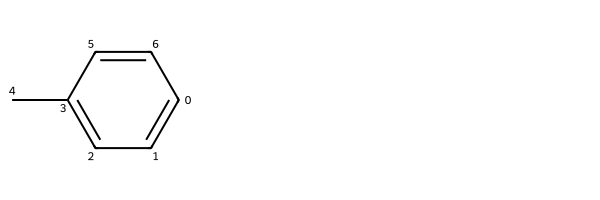

In [2]:
# set smiles for toluene
smiles = "c1ccc(C)cc1"

#convert to RDKIT molecule
mol = Chem.MolFromSmiles(smiles)

# Draw
Draw.MolsToGridImage([mol])

In [3]:
# add H
mol_h = Chem.AddHs(mol)

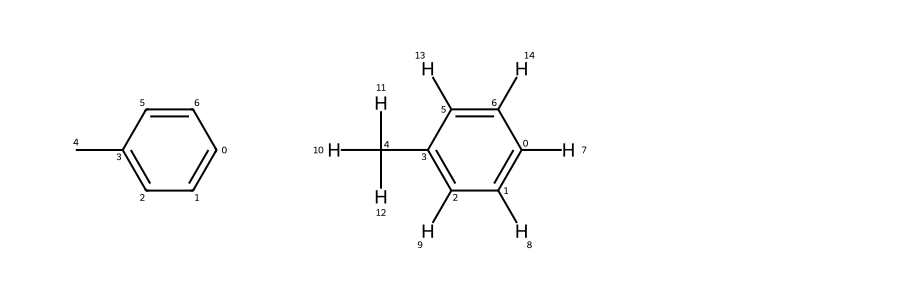

In [4]:
# Display both structures
Draw.MolsToGridImage([mol, mol_h], subImgSize =(300,300))

In [5]:
# Current molecule has z_coordinate = 0 for all atoms (i.e. 2D str)
# This is a 2D molecule
print(Chem.MolToMolBlock(mol_h))


     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

In [6]:
# Making it 3D by generating random conformer
Chem.AllChem.EmbedMolecule(mol_h)

print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
   -2.0966    0.0369   -0.1978 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3572    1.2011   -0.1586 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0172    1.1797   -0.0330 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7242   -0.0101    0.0601 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2014   -0.0352    0.1953 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0222   -1.1710    0.0203 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3959   -1.1482   -0.1053 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1749    0.0551   -0.2964 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8719    2.1639   -0.2288 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6184    2.0823   -0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7213   -0.1556   -0.7780 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5975    0.8839    0.6656 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4893   -0.8693    0.8988 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5006   -2.1268    0

In [7]:
# Saving the coordinate file
Chem.MolToXYZFile(mol_h, "toluene.xyz")

In [8]:
# Generating molecular structure with program is difficult
# hence an active field of research

# Manipulating the 3D structure

As we saw earlier the 3D conformer is randonly generated. But we want to modify the structure before starting any quantum chemistry calculations. Wrong structures or incorrect geometries lead to bad estimates. 

For demonstration we will use biphenyl and change the angle between two benzene rings.

To enable numbering of atoms, set the draw options

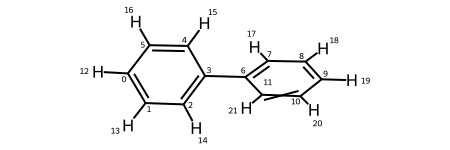

In [9]:
# create the 3D structure of biphenyl
smiles = "C1=CC=C(C=C1)C2=CC=CC=C2"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "initial.xyz")
mol

To change the dihedral angle, we need to set the value. The dihedral angle is the angle between the two planes of benzene. We need four atoms to describe the dihedral.

The syntax is

Chem.AllChem.SetDihedralDeg(*conformer*,a1,a2,a3,a4,*value*)  

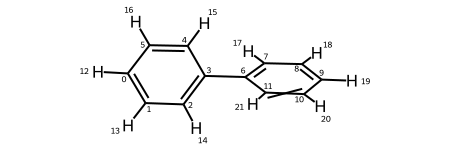

In [10]:
# please note that our index visulization command is not working
# therefore we are not able to see the atom indices, where the rotation
# is supposed to take place
# set thye value to 90 for the conformer

Chem.AllChem.SetDihedralDeg(mol.GetConformer(0), 4,3, 6, 11, 90.0)

# save the new conformer
Chem.MolToXYZFile(mol, "90.xyz")

# Looks like it is set to 90
mol

[23:29:54] Cannot write molecules with no conformers to XYZ block


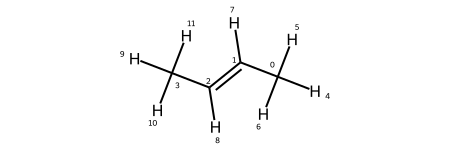

In [11]:
# generate cis-trans conformer of butene
smiles = "CC=CC"
mol = Chem.MolFromSmiles(smiles)
mol_h = Chem.AddHs(mol)
Chem.MolToXYZFile(mol_h, "initial_1.xyz")
mol_h

In [13]:

Chem.AllChem.SetDihedralDeg(mol_h.GetConformer(0), 0,1, 2, 3, 180.0)

# save the new conformer
Chem.MolToXYZFile(mol_h, "180.xyz")

# Looks like it is set to 180
mol_h

ValueError: Bad Conformer Id

# Combinatorial genration

To study the effect of functional group substitution, we need to create a library of molcules replaing the functional group. We can do that with combinatorial method. We will consider benzene core and some functional groups 

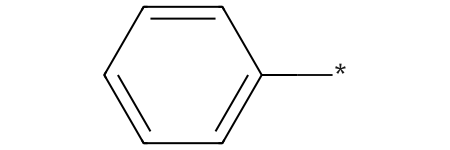

In [51]:
# geenrate the core molecule
core = Chem.MolFromSmiles("*c1ccccc1")
core

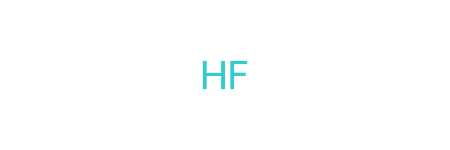

In [54]:
functional_group = "F"
functional_mol = Chem.MolFromSmiles(functional_group)
functional_mol

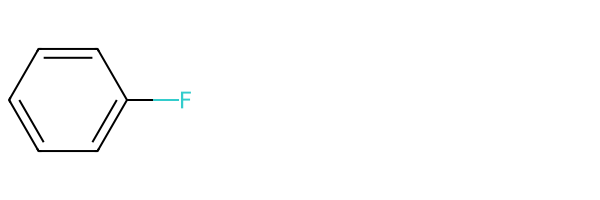

In [55]:
# generate the combined molecule
product = Chem.ReplaceSubstructs(core, Chem.MolFromSmarts('[#0]'), functional_mol)
new_smiles = Chem.MolToSmiles(product[0])
new_mol = Chem.MolFromSmiles(new_smiles)

Draw.MolsToGridImage([new_mol])

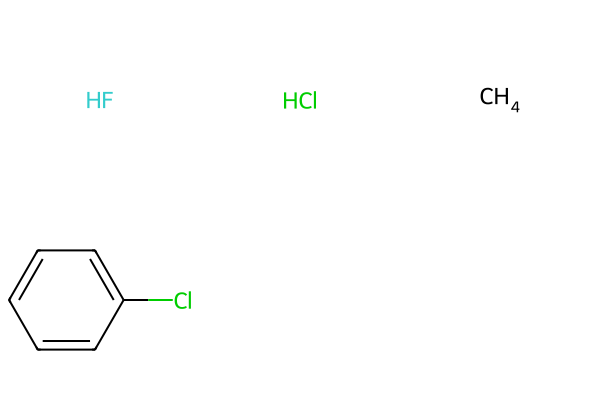

In [59]:
# for multiple functional groups
fgs = ['F', 'Cl', 'C', 'c1ccccc1Cl']
functional_mols = [Chem.MolFromSmiles(group) for group in fgs]


Draw.MolsToGridImage(functional_mols)

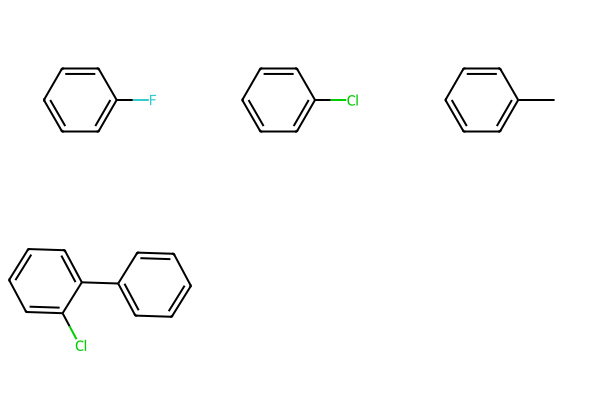

In [60]:
product_smi = []
for functional_mol in functional_mols:
    product_mol = Chem.ReplaceSubstructs(core, Chem.MolFromSmarts('[#0]'), functional_mol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
    
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])

# Running DFT calculation

We will use PySCF which is open-source software for running quantum chemistry calculations. You can find more details here - https://pyscf.org/

More tutorials and example files for PySCF are available at https://github.com/pyscf/pyscf/tree/master/examples

In [61]:
# import the package
from pyscf import gto, scf

We need a 3D structure input to PSI4. Then we set other parameters - DFT functional, basis set, charge. Details about the parametrs will be discussed in the next session.

In [62]:
# reading the xyz into PSI4 - first open the file and pass it to PSI4
mol = gto.M(atom = "toluene.xyz")

In [63]:
# set basis
mol.basis = "3-21G"

# set the functional
mf = mol.KS()
mf.xc = "b3lyp"

In [64]:
# running the cal
mf.kernel()

converged SCF energy = -268.065845155452


-268.0658451554516